In [76]:
import pandas as pd

%load_ext autoreload
%autoreload 2

folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'

alt_exons_bedfile = '{}/skipped_exon_exon2.bed'.format(folder)
constitutive_bedfile = '{}/constitutive_exons.bed'.format(folder)

bedfiles = alt_exons_bedfile, constitutive_bedfile

splicing_feature_data = pd.read_csv('{}/splicing_feature_data.csv'.format(folder), index_col=0)
splicing_feature_data.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,gencode_id,ensembl_id,gene_name,exon1_length,exon2_length,exon3_length,intron1_length,intron2_length,exon2_divisible_by_3,intron12_length_summed,one_ensembl_id
event_id,,,,,,,,,,,
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188908-100189399:-,ENSG00000107521.14,ENSG00000107521,HPS1,100,99,492,681,148,True,829,ENSG00000107521
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188913-100189399:-,ENSG00000107521.14,ENSG00000107521,HPS1,100,99,487,681,148,True,829,ENSG00000107521
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,ENSG00000107521.14,ENSG00000107521,HPS1,100,99,70,681,148,True,829,ENSG00000107521
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,ENSG00000107521.14,ENSG00000107521,HPS1,152,161,100,2648,460,False,3108,ENSG00000107521
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,ENSG00000107521.14,ENSG00000107521,HPS1,138,143,152,220,1180,False,1400,ENSG00000107521


In [77]:
import pybedtools
constitutive_bed = pybedtools.BedTool(constitutive_bedfile)
names = [x.name for x in constitutive_bed]

constitutive_feature_data = pd.DataFrame(index=names)

In [78]:
hg19_fasta = '/projects/ps-yeolab/genomes/hg19/gencode/v19/GRCh37.p13.genome.fa'

## Splice site strength

In [84]:
from poshsplice.splicestrength import score_exons


constitutive_scores = score_exons(constitutive_bedfile, 'hg19', hg19_fasta)
constitutive_scores.head()

,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq
exon:chr10:101162337-101162479:-,6.29,CGTCACTGTCCATGCTTCAGGAC,10.43,ACCGTAAGT
exon:chr10:101483713-101483880:-,5.75,TCATCTCTTGGGGGTTCTAGGGT,10.57,AAGGTAAGA
exon:chr10:101489310-101489491:-,7.69,TTGTCTATCTTGATCTTTAGTGT,9.66,TAGGTAAGT
exon:chr10:104183414-104183474:-,0.39,ACCCAGCCAGTTTTTGACAGGTA,7.66,GAGGTGAGA
exon:chr10:104245366-104245490:-,6.28,TCCCGGGCTCCTTTCACCAGCAT,7.21,CCTGTGAGT


In [92]:
alt_exons_scores = score_exons(alt_exons_bedfile, 'hg19', hg19_fasta)
alt_exons_scores.head()

,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188908-100189399:-,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188913-100189399:-,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,9.08,TCCCTTCCTGCCCTGGCTAGGCC,7.96,TAGGTGAGC
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,7.92,TGGCCTGCCTGTGCCTGCAGTTT,6.05,GGAGTGAGT


In [93]:
alt_exons_scores['exon_type'] = 'alternative'
constitutive_scores['exon_type'] = 'constitutive'

In [94]:
splice_site_scores = pd.concat([alt_exons_scores.reset_index(), constitutive_scores.reset_index()], ignore_index=True)
splice_site_scores.head()

,index,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq,exon_type
0,exon:chr10:100190328-100190427:-@exon:chr10:10...,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT,alternative
1,exon:chr10:100190328-100190427:-@exon:chr10:10...,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT,alternative
2,exon:chr10:100190328-100190427:-@exon:chr10:10...,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT,alternative
3,exon:chr10:100193697-100193848:-@exon:chr10:10...,9.08,TCCCTTCCTGCCCTGGCTAGGCC,7.96,TAGGTGAGC,alternative
4,exon:chr10:100195392-100195529:-@exon:chr10:10...,7.92,TGGCCTGCCTGTGCCTGCAGTTT,6.05,GGAGTGAGT,alternative


In [95]:
splice_site_scores = splice_site_scores.rename(columns={'index': 'event_name'})

### Make sure constitutive have, on average, higher splice site scores.

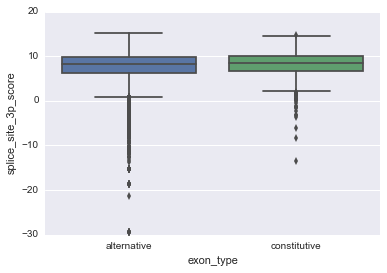

In [96]:
import seaborn as sns
%matplotlib inline
sns.boxplot(x='exon_type', y='splice_site_3p_score', data=splice_site_scores)

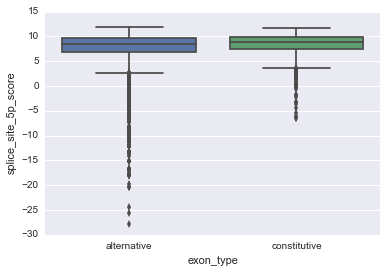

In [97]:
sns.boxplot(x='exon_type', y='splice_site_5p_score', data=splice_site_scores)

In [98]:
alt_exons_scores = alt_exons_scores.drop('exon_type', axis=1)

In [99]:
alt_exons_scores.columns = alt_exons_scores.columns.map(lambda x: "exon2_" + x)
alt_exons_scores.head()

,exon2_splice_site_3p_score,exon2_splice_site_3p_seq,exon2_splice_site_5p_score,exon2_splice_site_5p_seq
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188908-100189399:-,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188913-100189399:-,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,9.08,TCCCTTCCTGCCCTGGCTAGGCC,7.96,TAGGTGAGC
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,7.92,TGGCCTGCCTGTGCCTGCAGTTT,6.05,GGAGTGAGT


In [100]:
join_cols = alt_exons_scores.columns.difference(splicing_feature_data.columns)
if len(join_cols) > 0:
    splicing_feature_data = splicing_feature_data.join(alt_exons_scores[join_cols], how='outer')
splicing_feature_data.head()

,gencode_id,ensembl_id,gene_name,exon1_length,exon2_length,exon3_length,intron1_length,intron2_length,exon2_divisible_by_3,intron12_length_summed,one_ensembl_id,skipped_exon_exon2_splice_site_3p_score,skipped_exon_exon2_splice_site_3p_seq,skipped_exon_exon2_splice_site_5p_score,skipped_exon_exon2_splice_site_5p_seq,exon2_splice_site_3p_score,exon2_splice_site_3p_seq,exon2_splice_site_5p_score,exon2_splice_site_5p_seq
event_id,,,,,,,,,,,,,,,,,,,
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188908-100189399:-,ENSG00000107521.14,ENSG00000107521,HPS1,100,99,492,681,148,True,829,ENSG00000107521,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188913-100189399:-,ENSG00000107521.14,ENSG00000107521,HPS1,100,99,487,681,148,True,829,ENSG00000107521,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,ENSG00000107521.14,ENSG00000107521,HPS1,100,99,70,681,148,True,829,ENSG00000107521,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,ENSG00000107521.14,ENSG00000107521,HPS1,152,161,100,2648,460,False,3108,ENSG00000107521,9.08,TCCCTTCCTGCCCTGGCTAGGCC,7.96,TAGGTGAGC,9.08,TCCCTTCCTGCCCTGGCTAGGCC,7.96,TAGGTGAGC
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,ENSG00000107521.14,ENSG00000107521,HPS1,138,143,152,220,1180,False,1400,ENSG00000107521,7.92,TGGCCTGCCTGTGCCTGCAGTTT,6.05,GGAGTGAGT,7.92,TGGCCTGCCTGTGCCTGCAGTTT,6.05,GGAGTGAGT


## Exon conservation

In [4]:
import os
import glob

from gscripts.qtools import Submitter

commands = []

bw = '/projects/ps-yeolab/genomes/hg19/hg19_phastcons_placental_mammal.bw'

for bedfile in bedfiles:
    basename = os.path.basename(bedfile)
    
    prefix = basename.split('.bed')[0]
    
    prefix += '_phastcons_placental_mammal'
    bedout = '{}/{}'.format(folder, prefix + '.bed')
    outtab = '{}/{}'.format(folder, prefix + '.txt')
    command = 'bigWigAverageOverBed {} {} {} -bedOut={}'.format(bw, bedfile, outtab, bedout)
    print command
    commands.append(command)

jobname = 'exonbody_conservation'
Submitter(commands, jobname, array=True, walltime='2:00:00', write_and_submit=True,
          err_filename='{}/{}.err'.format(folder, jobname),
          out_filename='{}/{}.out'.format(folder, jobname))

running 2 tasks as an array-job.
job ID: 3309892


bigWigAverageOverBed /projects/ps-yeolab/genomes/hg19/hg19_phastcons_placental_mammal.bw /projects/ps-yeolab/obotvinnik/singlecell_pnms/skipped_exon_exon2.bed /projects/ps-yeolab/obotvinnik/singlecell_pnms/skipped_exon_exon2_phastcons_placental_mammal.txt -bedOut=/projects/ps-yeolab/obotvinnik/singlecell_pnms/skipped_exon_exon2_phastcons_placental_mammal.bed
bigWigAverageOverBed /projects/ps-yeolab/genomes/hg19/hg19_phastcons_placental_mammal.bw /projects/ps-yeolab/obotvinnik/singlecell_pnms/constitutive_exons.bed /projects/ps-yeolab/obotvinnik/singlecell_pnms/constitutive_exons_phastcons_placental_mammal.txt -bedOut=/projects/ps-yeolab/obotvinnik/singlecell_pnms/constitutive_exons_phastcons_placental_mammal.bed


### Read output of exon conservation from [0.2.05]

In [101]:
import glob
import os
import pandas as pd

column_names = ['event_name', 'size', 'covered', 'sum', 'mean0', 'mean']

dfs = []
for bedfile in bedfiles:
    basename = os.path.basename(bedfile)
    
    prefix = basename.split('.bed')[0]
    prefix += '_phastcons_placental_mammal'

    outtab = '{}/{}'.format(folder, prefix + '.txt')
    
    df = pd.read_table(outtab, header=None, index_col=0, names=column_names)
    
    s = df['mean']
#     df = s.to_frame()
    
    if 'constitutive' in bedfile:
        s.name = 'phastcons_placental_mammal'
        constitutive_feature_data = constitutive_feature_data.join(s)
    else:
        s.name = prefix
        splicing_feature_data = splicing_feature_data.join(s)

In [102]:
print splicing_feature_data.shape

(58842, 20)


In [103]:
splicing_feature_data.head()

,gencode_id,ensembl_id,gene_name,exon1_length,exon2_length,exon3_length,intron1_length,intron2_length,exon2_divisible_by_3,intron12_length_summed,one_ensembl_id,skipped_exon_exon2_splice_site_3p_score,skipped_exon_exon2_splice_site_3p_seq,skipped_exon_exon2_splice_site_5p_score,skipped_exon_exon2_splice_site_5p_seq,exon2_splice_site_3p_score,exon2_splice_site_3p_seq,exon2_splice_site_5p_score,exon2_splice_site_5p_seq,skipped_exon_exon2_phastcons_placental_mammal
event_id,,,,,,,,,,,,,,,,,,,,
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188908-100189399:-,ENSG00000107521.14,ENSG00000107521,HPS1,100,99,492,681,148,True,829,ENSG00000107521,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT,0.291112
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100188913-100189399:-,ENSG00000107521.14,ENSG00000107521,HPS1,100,99,487,681,148,True,829,ENSG00000107521,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT,0.291112
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,ENSG00000107521.14,ENSG00000107521,HPS1,100,99,70,681,148,True,829,ENSG00000107521,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT,0.291112
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,ENSG00000107521.14,ENSG00000107521,HPS1,152,161,100,2648,460,False,3108,ENSG00000107521,9.08,TCCCTTCCTGCCCTGGCTAGGCC,7.96,TAGGTGAGC,9.08,TCCCTTCCTGCCCTGGCTAGGCC,7.96,TAGGTGAGC,0.803519
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,ENSG00000107521.14,ENSG00000107521,HPS1,138,143,152,220,1180,False,1400,ENSG00000107521,7.92,TGGCCTGCCTGTGCCTGCAGTTT,6.05,GGAGTGAGT,7.92,TGGCCTGCCTGTGCCTGCAGTTT,6.05,GGAGTGAGT,0.839394


In [105]:
splicing_feature_data.tail()

,gencode_id,ensembl_id,gene_name,exon1_length,exon2_length,exon3_length,intron1_length,intron2_length,exon2_divisible_by_3,intron12_length_summed,one_ensembl_id,skipped_exon_exon2_splice_site_3p_score,skipped_exon_exon2_splice_site_3p_seq,skipped_exon_exon2_splice_site_5p_score,skipped_exon_exon2_splice_site_5p_seq,exon2_splice_site_3p_score,exon2_splice_site_3p_seq,exon2_splice_site_5p_score,exon2_splice_site_5p_seq,skipped_exon_exon2_phastcons_placental_mammal
event_id,,,,,,,,,,,,,,,,,,,,
exon:chrY:59356791-59356943:+@exon:chrY:59357703-59357771:+@exon:chrY:59357912-59358305:+,"ENSGR0000182484.10,ENSGR0000270726.1","ENSGR0000182484,ENSGR0000270726","AJ271736.10,WASH6P",153,69,394,759,140,True,899,ENSGR0000182484,9.17,CTGTGGCTTTCCCGTTGCAGTGA,6.45,AGGGTAGGA,9.17,CTGTGGCTTTCCCGTTGCAGTGA,6.45,AGGGTAGGA,0.849382
exon:chrY:59356791-59356943:+@exon:chrY:59357703-59357771:+@exon:chrY:59357912-59358337:+,"ENSGR0000182484.10,ENSGR0000270726.1","ENSGR0000182484,ENSGR0000270726","AJ271736.10,WASH6P",153,69,426,759,140,True,899,ENSGR0000182484,9.17,CTGTGGCTTTCCCGTTGCAGTGA,6.45,AGGGTAGGA,9.17,CTGTGGCTTTCCCGTTGCAGTGA,6.45,AGGGTAGGA,0.849382
exon:chrY:59356791-59356943:+@exon:chrY:59357703-59357771:+@exon:chrY:59357912-59358381:+,"ENSGR0000182484.10,ENSGR0000270726.1","ENSGR0000182484,ENSGR0000270726","AJ271736.10,WASH6P",153,69,470,759,140,True,899,ENSGR0000182484,9.17,CTGTGGCTTTCCCGTTGCAGTGA,6.45,AGGGTAGGA,9.17,CTGTGGCTTTCCCGTTGCAGTGA,6.45,AGGGTAGGA,0.849382
exon:chrY:7194108-7194210:+@exon:chrY:7209156-7209275:+@exon:chrY:7224176-7224264:+,ENSG00000099725.10,ENSG00000099725,PRKY,103,120,89,14945,14900,True,29845,ENSG00000099725,10.10,TGTCTCTGTCGCCCATATAGGAC,9.65,GGGGTAAGT,10.10,TGTCTCTGTCGCCCATATAGGAC,9.65,GGGGTAAGT,0.704546
exon:chrY:7194108-7194210:+@exon:chrY:7209156-7209275:+@exon:chrY:7224176-7224271:+,ENSG00000099725.10,ENSG00000099725,PRKY,103,120,96,14945,14900,True,29845,ENSG00000099725,10.10,TGTCTCTGTCGCCCATATAGGAC,9.65,GGGGTAAGT,10.10,TGTCTCTGTCGCCCATATAGGAC,9.65,GGGGTAAGT,0.704546


### Write the data!

In [106]:
splicing_feature_data.to_csv('{}/splicing_feature_data.csv'.format(folder))